In [2]:
print('testing jupyter')

testing jupyter


In [1]:
import numpy as np
import pandas as pd
import math
import os

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('train.csv')

df.head(5)
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

(58592, 44)

In [3]:
df.describe()

policy_tenure    age_of_car  age_of_policyholder  population_density  \
count   58592.000000  58592.000000         58592.000000        58592.000000   
mean        0.611246      0.069424             0.469420        18826.858667   
std         0.414156      0.056721             0.122886        17660.174792   
min         0.002735      0.000000             0.288462          290.000000   
25%         0.210250      0.020000             0.365385         6112.000000   
50%         0.573792      0.060000             0.451923         8794.000000   
75%         1.039104      0.110000             0.548077        27003.000000   
max         1.396641      1.000000             1.000000        73430.000000   

               make       airbags  displacement      cylinder      gear_box  \
count  58592.000000  58592.000000  58592.000000  58592.000000  58592.000000   
mean       1.763722      3.137066   1162.355851      3.626963      5.245443   
std        1.136988      1.832641    266.304786      0.483616      0.430353   
min        1.000000      1.000000    796.000000      3.000000      5.000000   
25%        1.000000      2.000000    796.000000      3.000000      5.000000   
50%        1.000000      2.000000   1197.000000      4.000000      5.000000   
75%        3.000000      6.000000   1493.000000      4.000000      5.000000   
max        5.000000      6.000000   1498.000000      4.000000      6.000000   

       turning_radius        length         width       height  gross_weight  \
count    58592.000000  58592.000000  58592.000000  58592.00000  58592.000000   
mean         4.852893   3850.476891   1672.233667   1553.33537   1385.276813   
std          0.228061    311.457119    112.089135     79.62227    212.423085   
min          4.500000   3445.000000   1475.000000   1475.00000   1051.000000   
25%          4.600000   3445.000000   1515.000000   1475.00000   1185.000000   
50%          4.800000   3845.000000   1735.000000   1530.00000   1335.000000   
75%          5.000000   3995.000000   1755.000000   1635.00000   1510.000000   
max          5.200000   4300.000000   1811.000000   1825.00000   1720.000000   

        ncap_rating      is_claim  
count  58592.000000  58592.000000  
mean       1.759950      0.063968  
std        1.389576      0.244698  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        2.000000      0.000000  
75%        3.000000      0.000000  
max        5.000000      1.000000

In [4]:
from pandas_profiling import ProfileReport
report = ProfileReport(df)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ImportError: cannot import name 'DataError' from 'pandas.core.base' (/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/base.py)

In [5]:
df.shape

(58592, 44)

In [6]:
df.info

<bound method DataFrame.info of       policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0       ID00001       0.515874        0.05             0.644231           C1   
1       ID00002       0.672619        0.02             0.375000           C2   
2       ID00003       0.841110        0.02             0.384615           C3   
3       ID00004       0.900277        0.11             0.432692           C4   
4       ID00005       0.596403        0.11             0.634615           C5   
...         ...            ...         ...                  ...          ...   
58587   ID58588       0.355089        0.13             0.644231           C8   
58588   ID58589       1.199642        0.02             0.519231          C14   
58589   ID58590       1.162273        0.05             0.451923           C5   
58590   ID58591       1.236307        0.14             0.557692           C8   
58591   ID58592       0.124429        0.02             0.442308           C8   

       

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [8]:
df.isna()

policy_id  policy_tenure  age_of_car  age_of_policyholder  \
0          False          False       False                False   
1          False          False       False                False   
2          False          False       False                False   
3          False          False       False                False   
4          False          False       False                False   
...          ...            ...         ...                  ...   
58587      False          False       False                False   
58588      False          False       False                False   
58589      False          False       False                False   
58590      False          False       False                False   
58591      False          False       False                False   

       area_cluster  population_density   make  segment  model  fuel_type  \
0             False               False  False    False  False      False   
1             False               False  False    False  False      False   
2             False               False  False    False  False      False   
3             False               False  False    False  False      False   
4             False               False  False    False  False      False   
...             ...                 ...    ...      ...    ...        ...   
58587         False               False  False    False  False      False   
58588         False               False  False    False  False      False   
58589         False               False  False    False  False      False   
58590         False               False  False    False  False      False   
58591         False               False  False    False  False      False   

       ...  is_brake_assist  is_power_door_locks  is_central_locking  \
0      ...            False                False               False   
1      ...            False                False               False   
2      ...            False                False               False   
3      ...            False                False               False   
4      ...            False                False               False   
...    ...              ...                  ...                 ...   
58587  ...            False                False               False   
58588  ...            False                False               False   
58589  ...            False                False               False   
58590  ...            False                False               False   
58591  ...            False                False               False   

       is_power_steering  is_driver_seat_height_adjustable  \
0                  False                             False   
1                  False                             False   
2                  False                             False   
3                  False                             False   
4                  False                             False   
...                  ...                               ...   
58587              False                             False   
58588              False                             False   
58589              False                             False   
58590              False                             False   
58591              False                             False   

       is_day_night_rear_view_mirror  is_ecw  is_speed_alert  ncap_rating  \
0                              False   False           False        False   
1                              False   False           False        False   
2                              False   False           False        False   
3                              False   False           False        False   
4                              False   False           False        False   
...                              ...     ...             ...          ...   
58587                          False   False           False        False   
58588                          False   

In [9]:
df = df.dropna(axis=0)

In [13]:
df_final = df.drop('policy_id',axis=1)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  object 
 4   population_density                58592 non-null  int64  
 5   make                              58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [23]:
df.dtypes.values[2]

dtype('float64')

In [32]:
data_types = dict(enumerate(df.dtypes.values))
print([i for i in data_types.keys() if data_types[i] == 
       'object'])

[0, 4, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 22, 24, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]


In [33]:
category_indices = [i for i in data_types.keys() if data_types[i] == 
       'object']

encoder = OneHotEncoder(categories=category_indices)

encoder.fit(df)

df_encoded = encoder.transform(df)

ValueError: Shape mismatch: if categories is an array, it has to be of shape (n_features,).

In [34]:
category_indices = [i for i in data_types.keys() if data_types[i] == 
       'object']

encoder = OneHotEncoder(categories=category_indices)

In [35]:
category_indices = [i for i in data_types.keys() if data_types[i] == 
       'object']

encoder = OneHotEncoder(categorical_features=category_indices)

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'categorical_features'

In [36]:

encoder = OneHotEncoder(categorical_features=[1])

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'categorical_features'

In [39]:
encoder = OneHotEncoder()

encoder.fit(df)

df_encoded = encoder.transform(df)

print(df_encoded)

  (0, 0)	1.0
  (0, 85234)	1.0
  (0, 117189)	1.0
  (0, 117270)	1.0
  (0, 117308)	1.0
  (0, 117333)	1.0
  (0, 117352)	1.0
  (0, 117357)	1.0
  (0, 117363)	1.0
  (0, 117374)	1.0
  (0, 117382)	1.0
  (0, 117388)	1.0
  (0, 117401)	1.0
  (0, 117407)	1.0
  (0, 117409)	1.0
  (0, 117411)	1.0
  (0, 117413)	1.0
  (0, 117416)	1.0
  (0, 117417)	1.0
  (0, 117420)	1.0
  (0, 117421)	1.0
  (0, 117430)	1.0
  (0, 117433)	1.0
  (0, 117434)	1.0
  (0, 117438)	1.0
  :	:
  (58591, 117419)	1.0
  (58591, 117427)	1.0
  (58591, 117431)	1.0
  (58591, 117432)	1.0
  (58591, 117435)	1.0
  (58591, 117438)	1.0
  (58591, 117447)	1.0
  (58591, 117456)	1.0
  (58591, 117465)	1.0
  (58591, 117475)	1.0
  (58591, 117487)	1.0
  (58591, 117489)	1.0
  (58591, 117491)	1.0
  (58591, 117493)	1.0
  (58591, 117495)	1.0
  (58591, 117497)	1.0
  (58591, 117499)	1.0
  (58591, 117501)	1.0
  (58591, 117503)	1.0
  (58591, 117505)	1.0
  (58591, 117506)	1.0
  (58591, 117509)	1.0
  (58591, 117511)	1.0
  (58591, 117514)	1.0
  (58591, 117517)	1.0


In [40]:
categories = df.select_dtypes(include=[object])
categories.head(3)

policy_id area_cluster segment model fuel_type    max_torque  \
0   ID00001           C1       A    M1       CNG  60Nm@3500rpm   
1   ID00002           C2       A    M1       CNG  60Nm@3500rpm   
2   ID00003           C3       A    M1       CNG  60Nm@3500rpm   

          max_power        engine_type is_esc is_adjustable_steering  ...  \
0  40.36bhp@6000rpm  F8D Petrol Engine     No                     No  ...   
1  40.36bhp@6000rpm  F8D Petrol Engine     No                     No  ...   
2  40.36bhp@6000rpm  F8D Petrol Engine     No                     No  ...   

  is_rear_window_washer is_rear_window_defogger is_brake_assist  \
0                    No                      No              No   
1                    No                      No              No   
2                    No                      No              No   

  is_power_door_locks is_central_locking is_power_steering  \
0                  No                 No               Yes   
1                  No                 No               Yes   
2                  No                 No               Yes   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                               No                            No     No   
1                               No                            No     No   
2                               No                            No     No   

  is_speed_alert  
0            Yes  
1            Yes  
2            Yes  

[3 rows x 28 columns]

In [41]:
df = df.drop(['policy_id', 'max_torque','max_power','engine_type']
             ,axis=1)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  object 
 4   population_density                58592 non-null  int64  
 5   make                              58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   airbags                           58592 non-null  int64  
 10  is_esc                            58592 non-null  object 
 11  is_adjustable_steering            58592 non-null  object 
 12  is_t

In [43]:
categories = df.select_dtypes(include='object')

categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   area_cluster                      58592 non-null  object
 1   segment                           58592 non-null  object
 2   model                             58592 non-null  object
 3   fuel_type                         58592 non-null  object
 4   is_esc                            58592 non-null  object
 5   is_adjustable_steering            58592 non-null  object
 6   is_tpms                           58592 non-null  object
 7   is_parking_sensors                58592 non-null  object
 8   is_parking_camera                 58592 non-null  object
 9   rear_brakes_type                  58592 non-null  object
 10  transmission_type                 58592 non-null  object
 11  steering_type                     58592 non-null  object
 12  is_front_fog_light

In [44]:
encoder = OneHotEncoder()

encoder.fit(categories)

categories = encoder.transform(categories)

In [47]:
categories.shape

(58592, 83)

In [1]:
categories['Column']

NameError: name 'categories' is not defined

In [2]:
categories = df.select_dtypes(include='object')

categories.info()


NameError: name 'df' is not defined

In [3]:
import numpy as np
import pandas as pd
import math
import os

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import torch

# read CSV and profile data
df = pd.read_csv('train.csv')

df.head(5)
df.info()
df.shape
df.describe()

"""
2. data cleaning and preprocessing
"""

df.isna()

df = df.dropna(axis=0)

data_types = dict(enumerate(df.dtypes.values))

category_indices = [i for i in data_types.keys() if data_types[i] == 
       'object']

df = df.drop(['policy_id', 'max_torque','max_power','engine_type']
             ,axis=1)

categories = df.select_dtypes(include='object')

categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [4]:
categories['Column']

KeyError: 'Column'

In [6]:
categories.keys()[1]

'segment'

In [7]:
df[categories.keys()]

area_cluster segment model fuel_type is_esc is_adjustable_steering  \
0               C1       A    M1       CNG     No                     No   
1               C2       A    M1       CNG     No                     No   
2               C3       A    M1       CNG     No                     No   
3               C4      C1    M2    Petrol    Yes                    Yes   
4               C5       A    M3    Petrol     No                     No   
...            ...     ...   ...       ...    ...                    ...   
58587           C8       A    M3    Petrol     No                     No   
58588          C14       A    M1       CNG     No                     No   
58589           C5       A    M1       CNG     No                     No   
58590           C8      B2    M6    Petrol     No                    Yes   
58591           C8      C2    M4    Diesel    Yes                    Yes   

      is_tpms is_parking_sensors is_parking_camera rear_brakes_type  ...  \
0          No                Yes                No             Drum  ...   
1          No                Yes                No             Drum  ...   
2          No                Yes                No             Drum  ...   
3          No                Yes               Yes             Drum  ...   
4          No                 No               Yes             Drum  ...   
...       ...                ...               ...              ...  ...   
58587      No                 No               Yes             Drum  ...   
58588      No                Yes                No             Drum  ...   
58589      No                Yes                No             Drum  ...   
58590      No                Yes                No             Drum  ...   
58591     Yes                Yes               Yes             Disc  ...   

      is_rear_window_washer is_rear_window_defogger is_brake_assist  \
0                        No                      No              No   
1                        No                      No              No   
2                        No                      No              No   
3                        No                     Yes             Yes   
4                        No                      No              No   
...                     ...                     ...             ...   
58587                    No                      No              No   
58588                    No                      No              No   
58589                    No                      No              No   
58590                    No                      No             Yes   
58591                   Yes                     Yes             Yes   

      is_power_door_locks is_central_locking is_power_steering  \
0                      No                 No               Yes   
1                      No                 No               Yes   
2                      No                 No               Yes   
3                     Yes                Yes               Yes   
4                     Yes                Yes               Yes   
...                   ...                ...               ...   
58587                 Yes                Yes               Yes   
58588                  No                 No               Yes   
58589                  No                 No               Yes   
58590                 Yes                Yes               Yes   
58591                 Yes                Yes               Yes   

      is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                                   No                            No     No   
1                                   No                            No     No   
2                                   No                            No     No   
3                                  Yes                           Yes    Yes   
4                                   No                           Yes    Yes   
...                                ...                      

In [11]:
df_category = df[categories.keys()]
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

encoder.fit(df_category)

df_category = encoder.transform(df_category)

df_category

array([[ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [11.,  0.,  0., ...,  0.,  0.,  1.],
       [15.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [17.,  0.,  0., ...,  0.,  0.,  1.],
       [20.,  2.,  7., ...,  1.,  1.,  1.],
       [20.,  4.,  5., ...,  0.,  1.,  1.]])

In [18]:
df[categories.keys()] = df_category

df['is_claim']

0        0
1        0
2        0
3        0
4        0
        ..
58587    0
58588    0
58589    0
58590    0
58591    0
Name: is_claim, Length: 58592, dtype: int64

In [13]:

"""
the goal of this exercise is to implement a logistic regression
model from scikit-learn to predict if a customer will file an
insurance claim in the next 6 months
"""

"""
1. package management, data reading and profiling
"""

# importing necessary libraries
import numpy as np
import pandas as pd
import math
import os

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import torch

# read CSV and profile data
df = pd.read_csv('train.csv')

df.head(5)
df.info()
df.shape
df.describe()

"""
2. data cleaning and preprocessing
"""

df.isna()

df = df.dropna(axis=0)

data_types = dict(enumerate(df.dtypes.values))

category_indices = [i for i in data_types.keys() if data_types[i] == 
       'object']

df = df.drop(['policy_id', 'max_torque','max_power','engine_type']
             ,axis=1)

categories = df.select_dtypes(include='object')

categories.info()

df_category = df[categories.keys()]

encoder = OrdinalEncoder()

encoder.fit(df_category)

df_category = encoder.transform(df_category)

df[categories.keys()] = df_category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

policy_tenure  age_of_car  age_of_policyholder  area_cluster  \
0      -0.230283   -0.342447             1.422557     -1.915921   
1       0.148188   -0.871359            -0.768362     -0.299191   
2       0.555022   -0.871359            -0.690115      0.288711   
3       0.697883    0.715378            -0.298879      0.435686   
4      -0.035840    0.715378             1.344310      0.582662   

   population_density      make   segment     model  fuel_type   airbags  ...  \
0           -0.783513 -0.671712 -1.237709 -1.457229  -1.201594 -0.620458  ...   
1            0.462975 -0.671712 -1.237709 -1.457229  -1.201594 -0.620458  ...   
2           -0.835268 -0.671712 -1.237709 -1.457229  -1.201594 -0.620458  ...   
3            0.158275 -0.671712  0.677613 -0.518945   1.193337 -0.620458  ...   
4            0.900969  0.207812 -1.237709 -0.206184   1.193337 -0.620458  ...   

   is_brake_assist  is_power_door_locks  is_central_locking  \
0        -1.103691            -1.620622           -1.620622   
1        -1.103691            -1.620622           -1.620622   
2        -1.103691            -1.620622           -1.620622   
3         0.906051             0.617047            0.617047   
4        -1.103691             0.617047            0.617047   

   is_power_steering  is_driver_seat_height_adjustable  \
0           0.145151                         -1.187895   
1           0.145151                         -1.187895   
2           0.145151                         -1.187895   
3           0.145151                          0.841825   
4           0.145151                         -1.187895   

   is_day_night_rear_view_mirror    is_ecw  is_speed_alert  ncap_rating  \
0                      -0.783393 -1.620622        0.078956    -1.266548   
1                      -0.783393 -1.620622        0.078956    -1.266548   
2                      -0.783393 -1.620622        0.078956    -1.266548   
3                       1.276499  0.617047        0.078956     0.172752   
4                       1.276499  0.617047        0.078956     0.172752   

   is_claim  
0 -0.261418  
1 -0.261418  
2 -0.261418  
3 -0.261418  
4 -0.261418  

[5 rows x 40 columns]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  float64
 4   population_density                58592 non-null  float64
 5   make                              58592 non-null  float64
 6   segment                           58592 non-null  float64
 7   model                             58592 non-null  float64
 8   fuel_type                         58592 non-null  float64
 9   airbags                           58592 non-null  float64
 10  is_esc                            58592 non-null  float64
 11  is_adjustable_steering            58592 non-null  float64
 12  is_t

In [15]:
from sklearn.decomposition import PCA

In [16]:
"""
the goal of this exercise is to implement a logistic regression
model from scikit-learn to predict if a customer will file an
insurance claim in the next 6 months
"""

"""
1. package management, data reading and profiling
"""

# importing necessary libraries
import numpy as np
import pandas as pd
import math
import os

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import torch

# read CSV and profile data
df = pd.read_csv('train.csv')

df.head(5)
df.info()
df.shape
df.describe()

"""
2. data cleaning and preprocessing
"""

df.isna()

df = df.dropna(axis=0)

data_types = dict(enumerate(df.dtypes.values))

category_indices = [i for i in data_types.keys() if data_types[i] == 
       'object']

df = df.drop(['policy_id', 'max_torque','max_power','engine_type']
             ,axis=1)

categories = df.select_dtypes(include='object')

categories.info()

df_category = df[categories.keys()]

encoder = OrdinalEncoder()

encoder.fit(df_category)

df_category = encoder.transform(df_category)

df[categories.keys()] = df_category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [17]:
df.head(5)

policy_tenure  age_of_car  age_of_policyholder  area_cluster  \
0       0.515874        0.05             0.644231           0.0   
1       0.672619        0.02             0.375000          11.0   
2       0.841110        0.02             0.384615          15.0   
3       0.900277        0.11             0.432692          16.0   
4       0.596403        0.11             0.634615          17.0   

   population_density  make  segment  model  fuel_type  airbags  ...  \
0                4990     1      0.0    0.0        0.0        2  ...   
1               27003     1      0.0    0.0        0.0        2  ...   
2                4076     1      0.0    0.0        0.0        2  ...   
3               21622     1      3.0    3.0        2.0        2  ...   
4               34738     2      0.0    4.0        2.0        2  ...   

   is_brake_assist  is_power_door_locks  is_central_locking  \
0              0.0                  0.0                 0.0   
1              0.0                  0.0                 0.0   
2              0.0                  0.0                 0.0   
3              1.0                  1.0                 1.0   
4              0.0                  1.0                 1.0   

   is_power_steering  is_driver_seat_height_adjustable  \
0                1.0                               0.0   
1                1.0                               0.0   
2                1.0                               0.0   
3                1.0                               1.0   
4                1.0                               0.0   

   is_day_night_rear_view_mirror  is_ecw  is_speed_alert  ncap_rating  \
0                            0.0     0.0             1.0            0   
1                            0.0     0.0             1.0            0   
2                            0.0     0.0             1.0            0   
3                            1.0     1.0             1.0            2   
4                            1.0     1.0             1.0            2   

   is_claim  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 40 columns]

In [24]:
df_pc = df[['policy_tenure','age_of_policyholder']]

df_pc


policy_tenure  age_of_policyholder
0           0.515874             0.644231
1           0.672619             0.375000
2           0.841110             0.384615
3           0.900277             0.432692
4           0.596403             0.634615
...              ...                  ...
58587       0.355089             0.644231
58588       1.199642             0.519231
58589       1.162273             0.451923
58590       1.236307             0.557692
58591       0.124429             0.442308

[58592 rows x 2 columns]

In [1]:
"""
the goal of this exercise is to implement a logistic regression
model from scikit-learn to predict if a customer will file an
insurance claim in the next 6 months
"""

"""
1. package management, data reading and profiling
"""

# importing necessary libraries
import numpy as np
import pandas as pd
import math
import os

from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import torch

# read CSV and profile data
df = pd.read_csv('train.csv')

df.head(5)
df.info()
df.shape
df.describe()

"""
2. data cleaning and preprocessing
"""

df.isna()

df = df.dropna(axis=0)

data_types = dict(enumerate(df.dtypes.values))

category_indices = [i for i in data_types.keys() if data_types[i] == 
       'object']

df = df.drop(['policy_id', 'max_torque','max_power','engine_type']
             ,axis=1)

categories = df.select_dtypes(include='object')

categories.info()

df_category = df[categories.keys()]

encoder = OrdinalEncoder()

encoder.fit(df_category)

df_category = encoder.transform(df_category)

df[categories.keys()] = df_category

"""
3. PCA, and visualizing first two principal components
"""

pca = PCA(n_components=2)

components = pca.fit_transform(df)

fig = px.scatter(components, x=0, y=1, color=df['is_claim'])

fig.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [3]:
features = df.drop('is_claim',axis=1)
response = df['is_claim']

model = LogisticRegression()

model.fit(features, response)

X_predict = model.predict(features)

X_predict

array([0, 0, 0, ..., 0, 0, 0])

In [4]:
matrix = confusion_matrix(X_predict, response)

matrix

array([[54844,  3748],
       [    0,     0]])

In [8]:
features

policy_tenure  age_of_car  age_of_policyholder  area_cluster  \
0           0.515874        0.05             0.644231           0.0   
1           0.672619        0.02             0.375000          11.0   
2           0.841110        0.02             0.384615          15.0   
3           0.900277        0.11             0.432692          16.0   
4           0.596403        0.11             0.634615          17.0   
...              ...         ...                  ...           ...   
58587       0.355089        0.13             0.644231          20.0   
58588       1.199642        0.02             0.519231           5.0   
58589       1.162273        0.05             0.451923          17.0   
58590       1.236307        0.14             0.557692          20.0   
58591       0.124429        0.02             0.442308          20.0   

       population_density  make  segment  model  fuel_type  airbags  ...  \
0                    4990     1      0.0    0.0        0.0        2  ...   
1                   27003     1      0.0    0.0        0.0        2  ...   
2                    4076     1      0.0    0.0        0.0        2  ...   
3                   21622     1      3.0    3.0        2.0        2  ...   
4                   34738     2      0.0    4.0        2.0        2  ...   
...                   ...   ...      ...    ...        ...      ...  ...   
58587                8794     2      0.0    4.0        2.0        2  ...   
58588                7788     1      0.0    0.0        0.0        2  ...   
58589               34738     1      0.0    0.0        0.0        2  ...   
58590                8794     1      2.0    7.0        2.0        2  ...   
58591                8794     3      4.0    5.0        1.0        6  ...   

       is_rear_window_defogger  is_brake_assist  is_power_door_locks  \
0                          0.0              0.0                  0.0   
1                          0.0              0.0                  0.0   
2                          0.0              0.0                  0.0   
3                          1.0              1.0                  1.0   
4                          0.0              0.0                  1.0   
...                        ...              ...                  ...   
58587                      0.0              0.0                  1.0   
58588                      0.0              0.0                  0.0   
58589                      0.0              0.0                  0.0   
58590                      0.0              1.0                  1.0   
58591                      1.0              1.0                  1.0   

       is_central_locking  is_power_steering  \
0                     0.0                1.0   
1                     0.0                1.0   
2                     0.0                1.0   
3                     1.0                1.0   
4                     1.0                1.0   
...                   ...                ...   
58587                 1.0                1.0   
58588                 0.0                1.0   
58589                 0.0                1.0   
58590                 1.0                1.0   
58591                 1.0                1.0   

       is_driver_seat_height_adjustable  is_day_night_rear_view_mirror  \
0                                   0.0                            0.0   
1                                   0.0                            0.0   
2                                   0.0                            0.0   
3                                   1.0                            1.0   
4                                   0.0                            1.0   
...                                 ...                            ...   
58587                               0.0                            1.0   
58588                               0.0                            0.0   
58589                               0.0                            0.0   
58590                               1.0                    

In [9]:
features = df.drop('is_claim',axis=1)
y = df['is_claim']

model = LogisticRegression()

model.fit(features, response)

y_predict = model.predict(features)

matrix = confusion_matrix(y, y_predict)

matrix

array([[54844,     0],
       [ 3748,     0]])

In [12]:
y[12]

1

In [13]:
y_predict[12]

0

In [2]:

"""
the goal of this exercise is to implement a logistic regression
model from scikit-learn to predict if a customer will file an
insurance claim in the next 6 months
"""

"""
1. package management, data reading and profiling
"""

# importing necessary libraries
import numpy as np
import pandas as pd
import math
import os

from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import torch

# read CSV and profile data
df = pd.read_csv('train.csv')

df.head(5)
df.info()
df.shape
df.describe()

"""
2. data cleaning and preprocessing
"""

df.isna()

df = df.dropna(axis=0)

data_types = dict(enumerate(df.dtypes.values))

category_indices = [i for i in data_types.keys() if data_types[i] == 
       'object']

df = df.drop(['policy_id', 'max_torque','max_power','engine_type']
             ,axis=1)

categories = df.select_dtypes(include='object')

categories.info()

df_category = df[categories.keys()]

encoder = OrdinalEncoder()

encoder.fit(df_category)

df_category = encoder.transform(df_category)

df[categories.keys()] = df_category

"""
3. PCA, and visualizing first two principal components
"""

pca = PCA(n_components=2)

components = pca.fit_transform(df)

fig = px.scatter(components, x=0, y=1, color=df['is_claim'])

fig.show()

"""
4. fit model
"""

features = df.drop('is_claim',axis=1)
y = df['is_claim']

model = LogisticRegression()

model.fit(features, y)

y_predict = model.predict(features)

matrix = confusion_matrix(y, y_predict)

# fitting model this way is poor, lets try 2 principal components

features = df[['policy_tenure','age_of_policyholder']]
y_predict = df.drop('is_claim',axis=1)

model = LogisticRegression()

model.fit(features, y)

y_predict = model.predict(features)

matrix = confusion_matrix(y, y_predict)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

KeyError: ('policy_tenure', 'age_of_policyholder')

In [12]:
features = df[['policy_tenure','age_of_policyholder']]
y_predict = df.drop('is_claim',axis=1)

model = LogisticRegression()

model.fit(features, y)

y_predict = model.predict(features)

y_predict[1:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
from sklearn.metrics import classification_report
report = classification_report(y, y_predict)

report

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [1]:
df

NameError: name 'df' is not defined

In [ ]:
plt.pie(df['is_claim'].value_counts, labels=['No Claim', 'Claim'], radius=1, colors=['red','green'])
plt.legend()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

TypeError: float() argument must be a string or a real number, not 'method'

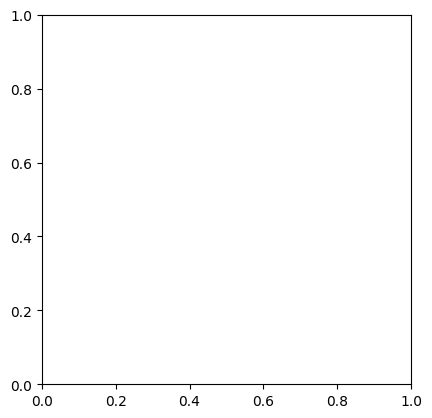

In [2]:

"""
the goal of this exercise is to implement a logistic regression
model from scikit-learn to predict if a customer will file an
insurance claim in the next 6 months
"""

"""
1. package management, data reading and profiling
"""

# importing necessary libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import torch

# read CSV and profile data
df = pd.read_csv('train.csv')

df.head(5)
df.info()
df.shape
df.describe()

fig = plt.figure(facecolor='white')

plt.pie(df['is_claim'].value_counts, labels=['No Claim', 'Claim'], radius=1, colors=['red','green'])
plt.legend()
plt.show()

df.hist(figsize=(12,10))
plt.tight_layout
plt.show()
"""
2. data cleaning and preprocessing
"""

df.isna()

df = df.dropna(axis=0)

data_types = dict(enumerate(df.dtypes.values))

category_indices = [i for i in data_types.keys() if data_types[i] == 
       'object']

df = df.drop(['policy_id', 'max_torque','max_power','engine_type']
             ,axis=1)

categories = df.select_dtypes(include='object')

categories.info()

df_category = df[categories.keys()]

encoder = OrdinalEncoder()

encoder.fit(df_category)

df_category = encoder.transform(df_category)

df[categories.keys()] = df_category

"""
3. PCA, and visualizing first two principal components
"""

pca = PCA(n_components=2)

components = pca.fit_transform(df)

fig = px.scatter(components, x=0, y=1, color=df['is_claim'])

fig.show()

"""
4. fit model
"""

features = df.drop('is_claim',axis=1)
y = df['is_claim']

model = LogisticRegression()

model.fit(features, y)

y_predict = model.predict(features)

matrix = confusion_matrix(y, y_predict)

report = classification_report(y, y_predict)

# fitting model this way is poor, lets try 2 principal components

features = df['policy_tenure','age_of_policyholder']
y_predict = df.drop('is_claim',axis=1)

model = LogisticRegression()

model.fit(features, y)

y_predict = model.predict(features)

matrix = confusion_matrix(y, y_predict)

In [3]:

"""
the goal of this exercise is to implement a logistic regression
model from scikit-learn to predict if a customer will file an
insurance claim in the next 6 months
"""

"""
1. package management, data reading and profiling
"""

# importing necessary libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import torch

# read CSV and profile data
df = pd.read_csv('train.csv')

df.head(5)
df.info()
df.shape
df.describe()

fig = plt.figure(facecolor='white')

plt.pie(df['is_claim'].value_counts(), labels=['No Claim', 'Claim'], radius=1, colors=['green', 'orange'],
        autopct='%1.1f%%', explode=[0.1, 0.15], labeldistance=1.15, startangle=45,
        textprops={'fontsize': 15, 'fontweight': 'bold'})plt.legend()
plt.show()

df.hist(figsize=(12,10))
plt.tight_layout
plt.show()
"""
2. data cleaning and preprocessing
"""

df.isna()

df = df.dropna(axis=0)

data_types = dict(enumerate(df.dtypes.values))

category_indices = [i for i in data_types.keys() if data_types[i] == 
       'object']

df = df.drop(['policy_id', 'max_torque','max_power','engine_type']
             ,axis=1)

categories = df.select_dtypes(include='object')

categories.info()

df_category = df[categories.keys()]

encoder = OrdinalEncoder()

encoder.fit(df_category)

df_category = encoder.transform(df_category)

df[categories.keys()] = df_category

"""
3. PCA, and visualizing first two principal components
"""

pca = PCA(n_components=2)

components = pca.fit_transform(df)

fig = px.scatter(components, x=0, y=1, color=df['is_claim'])

fig.show()

"""
4. fit model
"""

features = df.drop('is_claim',axis=1)
y = df['is_claim']

model = LogisticRegression()

model.fit(features, y)

y_predict = model.predict(features)

matrix = confusion_matrix(y, y_predict)

report = classification_report(y, y_predict)

# fitting model this way is poor, lets try 2 principal components

features = df['policy_tenure','age_of_policyholder']
y_predict = df.drop('is_claim',axis=1)

model = LogisticRegression()

model.fit(features, y)

y_predict = model.predict(features)

matrix = confusion_matrix(y, y_predict)

SyntaxError: invalid syntax (2574662338.py, line 41)

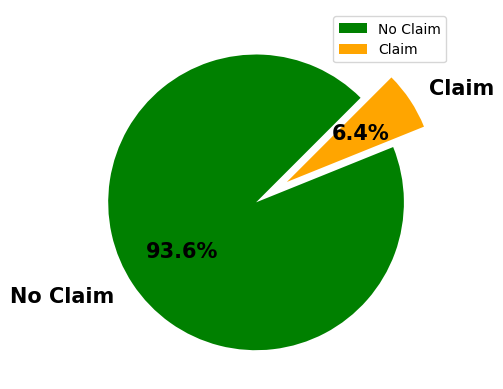

In [4]:

plt.pie(df['is_claim'].value_counts(), labels=['No Claim', 'Claim'], radius=1, colors=['green', 'orange'],
        autopct='%1.1f%%', explode=[0.1, 0.15], labeldistance=1.15, startangle=45,
        textprops={'fontsize': 15, 'fontweight': 'bold'})
plt.legend()
plt.show()

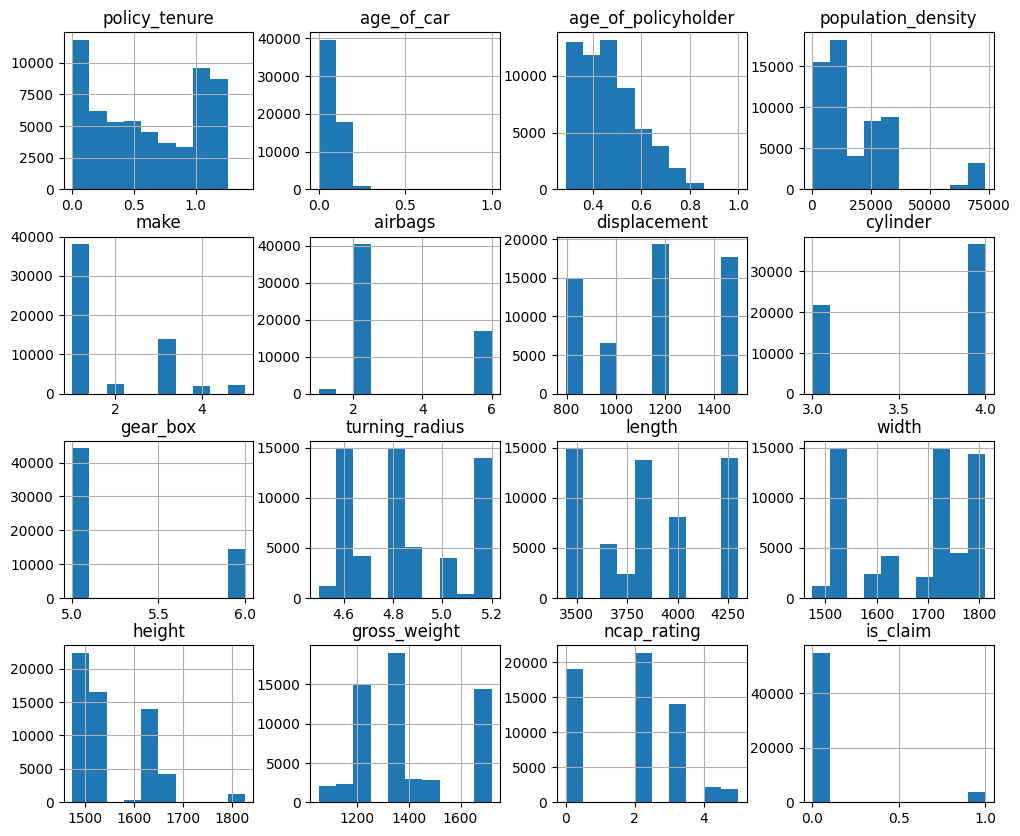

In [5]:
df.hist(figsize=(12,10))
plt.tight_layout
plt.show()

In [7]:

data_categories = df.select_dtypes(include=['object']).columns

df = pd.get_dummies(df, columns=data_categories,drop_first=True)

df.head(5)

policy_tenure  age_of_car  age_of_policyholder  population_density  make  \
0       0.515874        0.05             0.644231                4990     1   
1       0.672619        0.02             0.375000               27003     1   
2       0.841110        0.02             0.384615                4076     1   
3       0.900277        0.11             0.432692               21622     1   
4       0.596403        0.11             0.634615               34738     2   

   airbags  displacement  cylinder  gear_box  turning_radius  ...  \
0        2           796         3         5             4.6  ...   
1        2           796         3         5             4.6  ...   
2        2           796         3         5             4.6  ...   
3        2          1197         4         5             4.8  ...   
4        2           999         3         5             5.0  ...   

   is_rear_window_washer_Yes  is_rear_window_defogger_Yes  \
0                          0                            0   
1                          0                            0   
2                          0                            0   
3                          0                            1   
4                          0                            0   

   is_brake_assist_Yes  is_power_door_locks_Yes  is_central_locking_Yes  \
0                    0                        0                       0   
1                    0                        0                       0   
2                    0                        0                       0   
3                    1                        1                       1   
4                    0                        1                       1   

   is_power_steering_Yes  is_driver_seat_height_adjustable_Yes  \
0                      1                                     0   
1                      1                                     0   
2                      1                                     0   
3                      1                                     1   
4                      1                                     0   

   is_day_night_rear_view_mirror_Yes  is_ecw_Yes  is_speed_alert_Yes  
0                                  0           0                   1  
1                                  0           0                   1  
2                                  0           0                   1  
3                                  1           1                   1  
4                                  1           1                   1  

[5 rows x 58692 columns]

In [8]:
df_category = df[categories.keys()]

encoder = OrdinalEncoder()

encoder.fit(df_category)

df_category = encoder.transform(df_category)

df[categories.keys()] = df_category

NameError: name 'categories' is not defined

In [9]:
categories = df.select_dtypes(include='object')

df_category = df[categories.keys()]

encoder = OrdinalEncoder()

encoder.fit(df_category)

df_category = encoder.transform(df_category)

df[categories.keys()] = df_category

In [10]:
df

policy_tenure  age_of_car  age_of_policyholder  population_density  \
0           0.515874        0.05             0.644231                4990   
1           0.672619        0.02             0.375000               27003   
2           0.841110        0.02             0.384615                4076   
3           0.900277        0.11             0.432692               21622   
4           0.596403        0.11             0.634615               34738   
...              ...         ...                  ...                 ...   
58587       0.355089        0.13             0.644231                8794   
58588       1.199642        0.02             0.519231                7788   
58589       1.162273        0.05             0.451923               34738   
58590       1.236307        0.14             0.557692                8794   
58591       0.124429        0.02             0.442308                8794   

       make  airbags  displacement  cylinder  gear_box  turning_radius  ...  \
0         1        2           796         3         5             4.6  ...   
1         1        2           796         3         5             4.6  ...   
2         1        2           796         3         5             4.6  ...   
3         1        2          1197         4         5             4.8  ...   
4         2        2           999         3         5             5.0  ...   
...     ...      ...           ...       ...       ...             ...  ...   
58587     2        2           999         3         5             5.0  ...   
58588     1        2           796         3         5             4.6  ...   
58589     1        2           796         3         5             4.6  ...   
58590     1        2          1197         4         5             4.8  ...   
58591     3        6          1493         4         6             5.2  ...   

       is_rear_window_washer_Yes  is_rear_window_defogger_Yes  \
0                              0                            0   
1                              0                            0   
2                              0                            0   
3                              0                            1   
4                              0                            0   
...                          ...                          ...   
58587                          0                            0   
58588                          0                            0   
58589                          0                            0   
58590                          0                            0   
58591                          1                            1   

       is_brake_assist_Yes  is_power_door_locks_Yes  is_central_locking_Yes  \
0                        0                        0                       0   
1                        0                        0                       0   
2                        0                        0                       0   
3                        1                        1                       1   
4                        0                        1                       1   
...                    ...                      ...                     ...   
58587                    0                        1                       1   
58588                    0                        0                       0   
58589                    0                        0                       0   
58590                    1                        1                       1   
58591                    1                        1                       1   

       is_power_steering_Yes  is_driver_seat_height_adjustable_Yes  \
0                          1                                     0   
1                          1                                     0   
2                          1                                     0   
3                          1                                     1   
4                          1                         

In [11]:
category_indices = [i for i in data_types.keys() if data_types[i] == 
       'object']

df = df.drop(['policy_id', 'max_torque','max_power','engine_type']
             ,axis=1)


categories = df.select_dtypes(include='object')

df_category = df[categories.keys()]

encoder = OrdinalEncoder()

encoder.fit(df_category)

df_category = encoder.transform(df_category)

df[categories.keys()] = df_category


NameError: name 'data_types' is not defined

df.isna()

df = df.dropna(axis=0)

data_types = dict(enumerate(df.dtypes.values))

category_indices = [i for i in data_types.keys() if data_types[i] == 
       'object']

df = df.drop(['policy_id', 'max_torque','max_power','engine_type']
             ,axis=1)


categories = df.select_dtypes(include='object')

df_category = df[categories.keys()]

encoder = OrdinalEncoder()

encoder.fit(df_category)

df_category = encoder.transform(df_category)

df[categories.keys()] = df_category

In [12]:
df.isna()

df = df.dropna(axis=0)

data_types = dict(enumerate(df.dtypes.values))

category_indices = [i for i in data_types.keys() if data_types[i] == 
       'object']

df = df.drop(['policy_id', 'max_torque','max_power','engine_type']
             ,axis=1)


categories = df.select_dtypes(include='object')

df_category = df[categories.keys()]

encoder = OrdinalEncoder()

encoder.fit(df_category)

df_category = encoder.transform(df_category)

df[categories.keys()] = df_category

KeyError: "['policy_id', 'max_torque', 'max_power', 'engine_type'] not found in axis"

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import torch

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import torch

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

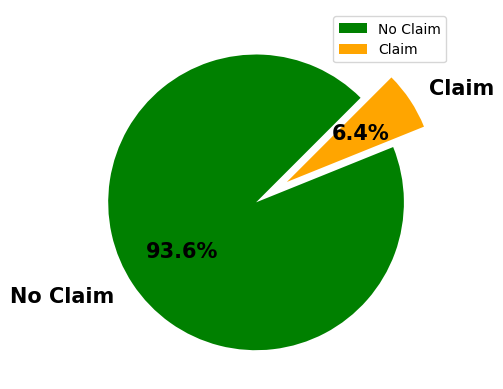

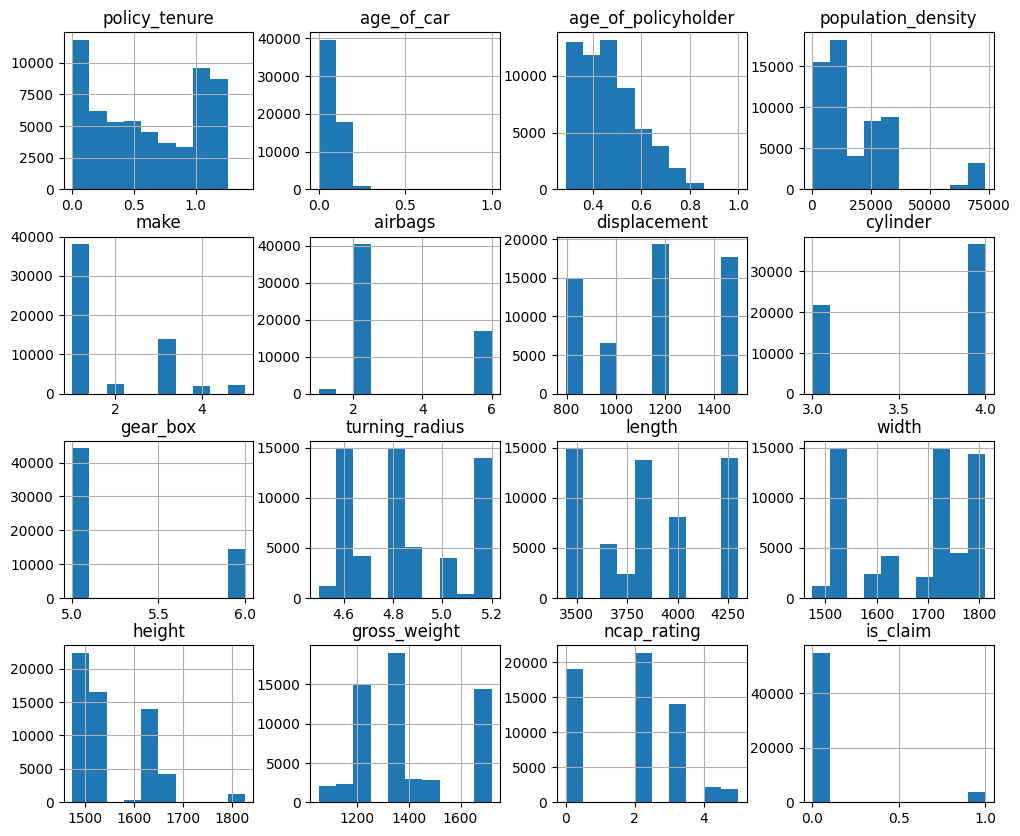

In [2]:
df = pd.read_csv('train.csv')

df.head(5)
df.info()
df.shape
df.describe()

fig = plt.figure(facecolor='white')

plt.pie(df['is_claim'].value_counts(), labels=['No Claim', 'Claim'], radius=1, colors=['green', 'orange'],
        autopct='%1.1f%%', explode=[0.1, 0.15], labeldistance=1.15, startangle=45,
        textprops={'fontsize': 15, 'fontweight': 'bold'})
plt.legend()
plt.show()

df.hist(figsize=(12,10))
plt.tight_layout
plt.show()
"""
2. data cleaning and preprocessing
"""

df.isna()

df = df.dropna(axis=0)

data_types = dict(enumerate(df.dtypes.values))

category_indices = [i for i in data_types.keys() if data_types[i] == 
       'object']

df = df.drop(['policy_id', 'max_torque','max_power','engine_type']
             ,axis=1)


categories = df.select_dtypes(include='object')

df_category = df[categories.keys()]

encoder = OrdinalEncoder()

encoder.fit(df_category)

df_category = encoder.transform(df_category)

df[categories.keys()] = df_category


In [15]:
from sklearn.utils import resample
negative_class = df[df['is_claim']==0]
positive_class = df[df['is_claim']==1]

undersampled_majority = resample(
    negative_class,
    replace=False,
    n_samples=2*len(positive_class),
    random_state=6
)

df_final = pd.concat([undersampled_majority,positive_class])

df_final

policy_tenure  age_of_car  age_of_policyholder  area_cluster  \
34615       0.372924        0.06             0.288462          20.0   
10406       0.598748        0.10             0.394231           4.0   
4639        0.725817        0.09             0.336538          20.0   
2583        0.111962        0.00             0.634615          17.0   
47961       1.172448        0.16             0.701923          11.0   
...              ...         ...                  ...           ...   
58559       0.484333        0.12             0.596154          20.0   
58567       1.148102        0.04             0.451923           3.0   
58573       0.151652        0.00             0.365385           0.0   
58574       0.278499        0.07             0.557692           4.0   
58581       0.090469        0.05             0.355769          17.0   

       population_density  make  segment  model  fuel_type  airbags  ...  \
34615                8794     2      0.0    4.0        2.0        2  ...   
10406                5410     2      0.0    4.0        2.0        2  ...   
4639                 8794     5      3.0   10.0        1.0        2  ...   
2583                34738     1      0.0    0.0        0.0        2  ...   
47961               27003     3      4.0    5.0        1.0        6  ...   
...                   ...   ...      ...    ...        ...      ...  ...   
58559                8794     1      2.0    8.0        2.0        6  ...   
58567               34791     3      4.0    5.0        1.0        6  ...   
58573                4990     1      0.0    0.0        0.0        2  ...   
58574                5410     3      4.0    5.0        1.0        6  ...   
58581               34738     3      4.0    5.0        1.0        6  ...   

       is_brake_assist  is_power_door_locks  is_central_locking  \
34615              0.0                  1.0                 1.0   
10406              0.0                  1.0                 1.0   
4639               0.0                  1.0                 1.0   
2583               0.0                  0.0                 0.0   
47961              1.0                  1.0                 1.0   
...                ...                  ...                 ...   
58559              1.0                  1.0                 1.0   
58567              1.0                  1.0                 1.0   
58573              0.0                  0.0                 0.0   
58574              1.0                  1.0                 1.0   
58581              1.0                  1.0                 1.0   

       is_power_steering  is_driver_seat_height_adjustable  \
34615                1.0                               0.0   
10406                1.0                               0.0   
4639                 1.0                               1.0   
2583                 1.0                               0.0   
47961                1.0                               1.0   
...                  ...                               ...   
58559                1.0                               1.0   
58567                1.0                               1.0   
58573                1.0                               0.0   
58574                1.0                               1.0   
58581                1.0                               1.0   

       is_day_night_rear_view_mirror  is_ecw  is_speed_alert  ncap_rating  \
34615                            1.0     1.0             1.0            2   
10406                            1.0     1.0             1.0            2   
4639                             1.0     1.0             1.0            4   
2583                             0.0     0.0             1.0            0   
47961                            0.0     1.0             1.0            3   
...                              ...     ...             ...          ...   
58559                            1.0     1.0             1.0            0   
58567                            0.0     1.0             1.0            3  

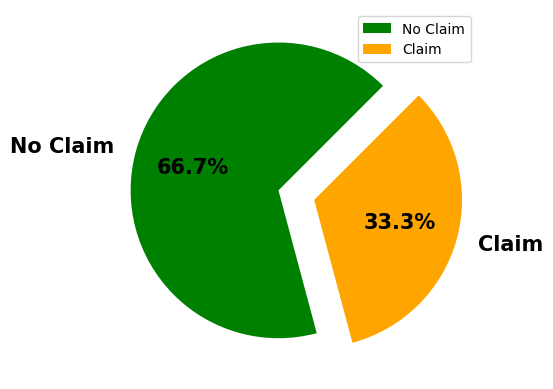

In [16]:
plt.pie(df_final['is_claim'].value_counts(), labels=['No Claim', 'Claim'], radius=1, colors=['green', 'orange'],
        autopct='%1.1f%%', explode=[0.1, 0.15], labeldistance=1.15, startangle=45,
        textprops={'fontsize': 15, 'fontweight': 'bold'})

plt.legend()
plt.show()

In [17]:
X = df_final.drop('is_claim',axis=1)
y_true = df_final['is_claim']

model = LogisticRegression()

model.fit(X, y_true)

y_predict = model.predict(X)

matrix = confusion_matrix(y_true, y_predict)

report = classification_report(y_true, y_predict)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [23]:
X = df_final[['policy_tenure','age_of_policyholder']]
y_true = df_final['is_claim']

model = LogisticRegression()

model.fit(X, y_true)

y_predict = model.predict(X)

matrix = confusion_matrix(y_true, y_predict)

policy_tenure  age_of_policyholder
34615       0.372924             0.288462
10406       0.598748             0.394231
4639        0.725817             0.336538
2583        0.111962             0.634615
47961       1.172448             0.701923
...              ...                  ...
58559       0.484333             0.596154
58567       1.148102             0.451923
58573       0.151652             0.365385
58574       0.278499             0.557692
58581       0.090469             0.355769

[11244 rows x 2 columns]

In [27]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_predict)

accuracy
x = classification_report(y_true, y_predict)

x

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

'              precision    recall  f1-score   support\n\n           0       0.67      1.00      0.80      7496\n           1       0.00      0.00      0.00      3748\n\n    accuracy                           0.67     11244\n   macro avg       0.33      0.50      0.40     11244\nweighted avg       0.44      0.67      0.53     11244\n'

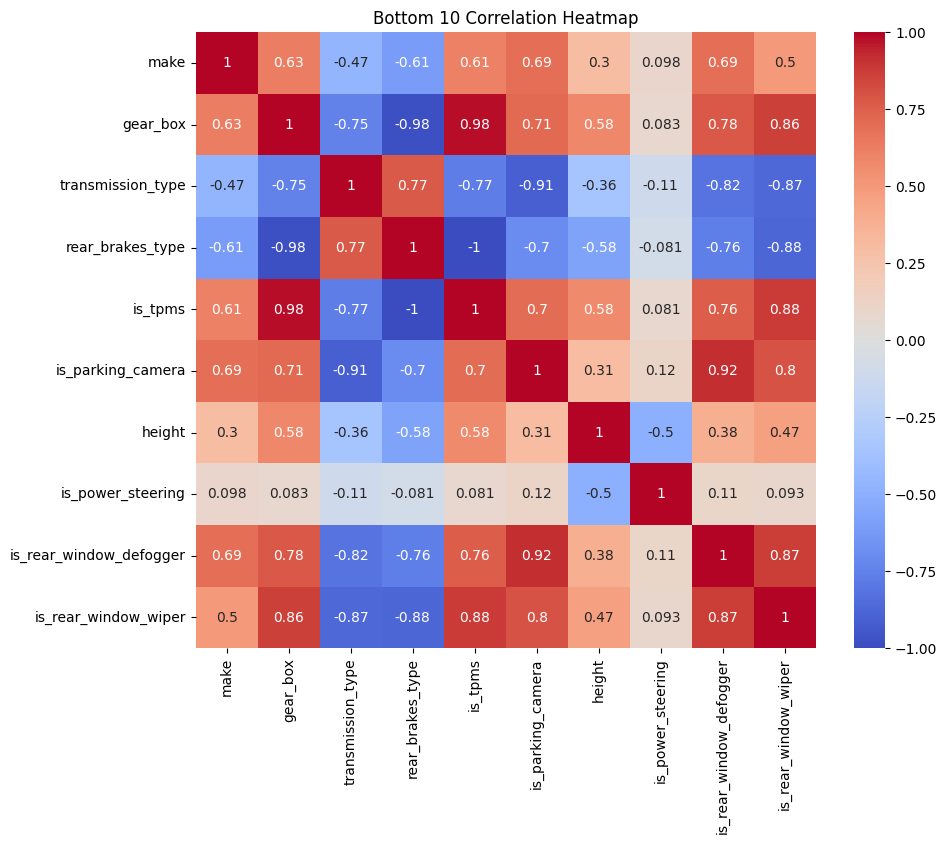

In [28]:
import seaborn as sns
num_bottom_features = 10

correlation_values = df.corr()['is_claim'].abs().sort_values(ascending=True)[:num_bottom_features]
bottom_features = correlation_values.index

subset_df = df[bottom_features]
correlation_matrix = subset_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title(f'Bottom {num_bottom_features} Correlation Heatmap')
plt.show()

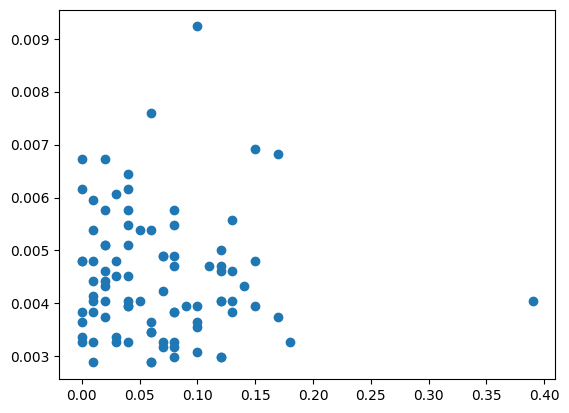

In [48]:
plt.scatter(df['age_of_car'][10:100], 
         .01*df['age_of_policyholder'][10:100])
plt.show()